In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use("dark_background")

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [3]:
ort = X_train.mean().to_dict()
X_train.fillna(ort,inplace=True)
X_test.fillna(ort,inplace=True)

In [9]:
buckets = [0,20,40,60,np.inf]
labels = ['0-20',"20-40","40-60",">60"]

X_train["age_buckets_labels"] = pd.cut(X_train["age"],bins=buckets,labels=labels,include_lowest=True)
X_train["age_buckets"] = pd.cut(X_train["age"],bins=buckets,include_lowest=True)
X_train.drop("fare",axis=1).head()

,age,age_buckets_labels,age_buckets
857,51.000000,40-60,"(40.0, 60.0]"
52,49.000000,40-60,"(40.0, 60.0]"
386,1.000000,0-20,"(-0.001, 20.0]"
124,54.000000,40-60,"(40.0, 60.0]"
578,29.915339,20-40,"(20.0, 40.0]"


<Axes: xlabel='age_buckets_labels'>

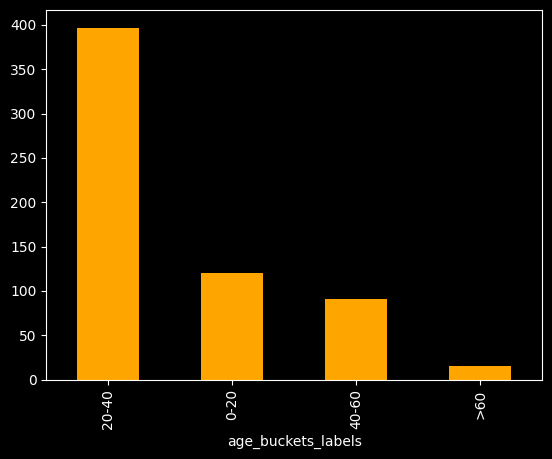

In [10]:
X_train["age_buckets_labels"].value_counts().plot.bar(color = "orange")

In [11]:
data = pd.read_csv("loan.csv",usecols=["income"])
data.head()

,income
0,84600.0
1,102000.0
2,69840.0
3,100386.0
4,95040.0


In [12]:
data.describe()

,income
count,1.000000e+04
mean,7.157229e+04
std,5.286105e+04
min,0.000000e+00
25%,4.365000e+04
50%,6.045000e+04
75%,8.536000e+04
max,2.185000e+06


In [15]:
buckets = [0,45000,65000,90000,150000,np.inf]

labels=["0-45k","45-65k","65-90k","90-150k",">150"]

data["income_buckets"] = pd.cut(data["income"],bins=buckets,labels=labels,include_lowest=True)
data.head() 

,income,income_buckets
0,84600.0,65-90k
1,102000.0,90-150k
2,69840.0,65-90k
3,100386.0,90-150k
4,95040.0,90-150k


<Axes: xlabel='income_buckets'>

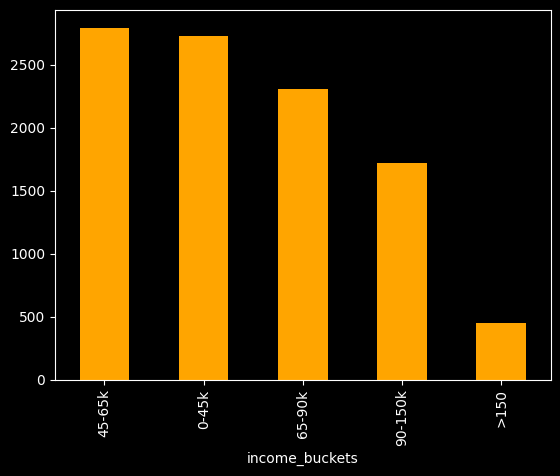

In [16]:
data["income_buckets"].value_counts().plot.bar(color="orange")

In [17]:
from feature_engine.discretisation import ArbitraryDiscretiser
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'],
    test_size=0.3,
    random_state=0)


ort = X_train.mean().to_dict()
X_train.fillna(ort,inplace=True)
X_test.fillna(ort,inplace=True)

In [21]:
disc = ArbitraryDiscretiser(
    binning_dict={
        "age":[0,18,25,40,80],
        "fare":[0,20,50,100,600]
        
    })
train_t=disc.fit_transform(X_train)
test_t = disc.transform(X_test)
train_t

,age,fare
857,3,1
52,3,2
386,0,1
124,3,2
578,2,0
...,...,...
835,2,2
192,1,0
629,2,0
559,2,0


<Axes: xlabel='age'>

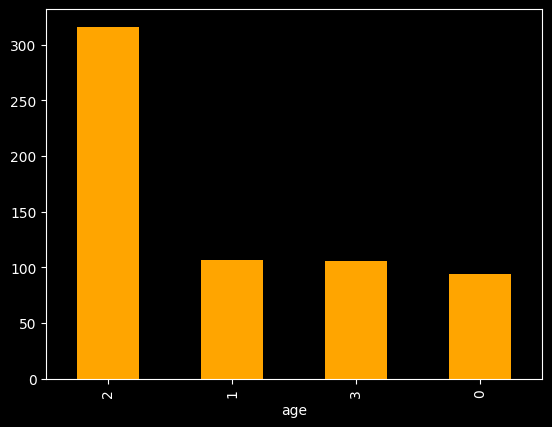

In [22]:
train_t.age.value_counts().plot.bar(color="orange")

<Axes: xlabel='age'>

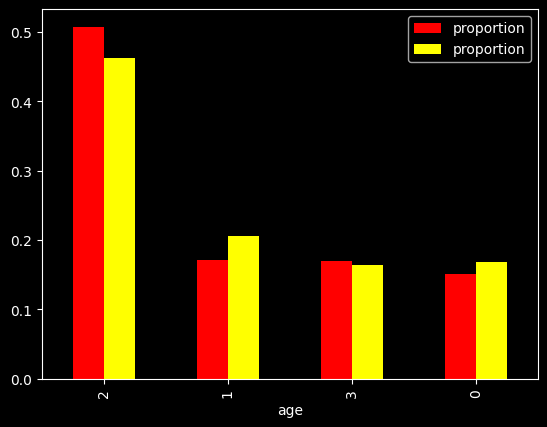

In [23]:
t1 = train_t["age"].value_counts(normalize=True)
t2 = test_t["age"].value_counts(normalize=True)

tmp = pd.concat([t1,t2],axis=1)
tmp.plot.bar(color=["red","yellow"])